In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv(r"C:\Users\ohtha\Downloads\dhritisingh21feb_17337639016981711.csv")

In [3]:
df.head()

,Country,State,Year,Total Registered Motor Vehicles (UOM:Number),Percentage Share (UOM:%(Percentage)),Vehicle Class,Category Of Vehicle,Production Of Motor Vehicles (UOM:Number),Year.1
0,India,Jharkhand,"Financial Year (Apr - Mar), 2017",3385347.0,1.24,Two Wheelers,Electric Two Wheelers,NaN,"Financial Year (Apr - Mar), 2016"
1,India,Jharkhand,"Financial Year (Apr - Mar), 2015",2477018.0,1.08,Two-Wheelers,Motor Cycles,2183785.0,"Financial Year (Apr - Mar), 2000"
2,India,The Dadra And Nagar Haveli And Daman And Diu,"Financial Year (Apr - Mar), 2017",117526.0,0.02,Passenger Vehicles,Utility Vehicles,219498.0,"Financial Year (Apr - Mar), 2008"
3,India,Nagaland,"Financial Year (Apr - Mar), 2018",489688.0,0.17,Commercial Vehicles,Light Commercial Vehicles (LCVs),225724.0,"Financial Year (Apr - Mar), 2006"
4,India,Meghalaya,"Financial Year (Apr - Mar), 2016",583107.0,0.23,Commercial Vehicles,M & HCVs (Medium & Heavy Commercial Vehicles),181242.0,"Financial Year (Apr - Mar), 2020"


In [4]:
print(df.columns)

Index(['Country', 'State', 'Year',
       'Total Registered Motor Vehicles (UOM:Number)',
       'Percentage Share (UOM:%(Percentage))', 'Vehicle Class',
       'Category Of Vehicle', 'Production Of Motor Vehicles (UOM:Number)',
       'Year.1'],
      dtype='object')


In [5]:
df.describe() 

,Total Registered Motor Vehicles (UOM:Number),Percentage Share (UOM:%(Percentage)),Production Of Motor Vehicles (UOM:Number)
count,1.800000e+02,180.000000,1.860000e+02
mean,7.655552e+06,2.793806,1.854042e+06
std,9.265779e+06,3.312293,3.293697e+06
min,1.600800e+04,0.010000,0.000000e+00
25%,3.821062e+05,0.170000,2.383240e+05
50%,3.385347e+06,1.250000,5.605270e+05
75%,1.118154e+07,4.020000,1.261130e+06
max,3.778626e+07,12.120000,1.649942e+07


In [6]:
print(df.shape)

(207, 9)


In [7]:
print(df.dtypes)

Country                                          object
State                                            object
Year                                             object
Total Registered Motor Vehicles (UOM:Number)    float64
Percentage Share (UOM:%(Percentage))            float64
Vehicle Class                                    object
Category Of Vehicle                              object
Production Of Motor Vehicles (UOM:Number)       float64
Year.1                                           object
dtype: object


Checking null values

In [8]:
df.isnull().sum()

Country                                         27
State                                           27
Year                                            27
Total Registered Motor Vehicles (UOM:Number)    27
Percentage Share (UOM:%(Percentage))            27
Vehicle Class                                    0
Category Of Vehicle                              0
Production Of Motor Vehicles (UOM:Number)       21
Year.1                                           0
dtype: int64

Handling Missing Data 

In [9]:
df['Total Registered Motor Vehicles (UOM:Number)'].fillna(df['Total Registered Motor Vehicles (UOM:Number)'].mean(), inplace=True)
df['Percentage Share (UOM:%(Percentage))'].fillna(df['Percentage Share (UOM:%(Percentage))'].mean(), inplace=True)
df['Production Of Motor Vehicles (UOM:Number)'].fillna(df['Production Of Motor Vehicles (UOM:Number)'].mean(), inplace=True)
df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace=True)
df['Category Of Vehicle'].fillna(df['Category Of Vehicle'].mode()[0], inplace=True)
print(df.isnull().sum())



Country                                         27
State                                           27
Year                                            27
Total Registered Motor Vehicles (UOM:Number)     0
Percentage Share (UOM:%(Percentage))             0
Vehicle Class                                    0
Category Of Vehicle                              0
Production Of Motor Vehicles (UOM:Number)        0
Year.1                                           0
dtype: int64


Preprocessing

In [10]:
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
print(df.isnull().sum())


Country                                         0
State                                           0
Year                                            0
Total Registered Motor Vehicles (UOM:Number)    0
Percentage Share (UOM:%(Percentage))            0
Vehicle Class                                   0
Category Of Vehicle                             0
Production Of Motor Vehicles (UOM:Number)       0
Year.1                                          0
dtype: int64


In [11]:
df_encoded = pd.get_dummies(df, columns=['Vehicle Class', 'Category Of Vehicle'], drop_first=True)
numeric_cols = ['Total Registered Motor Vehicles (UOM:Number)', 'Percentage Share (UOM:%(Percentage))', 'Production Of Motor Vehicles (UOM:Number)']
df_scaled = df_encoded[numeric_cols]
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
print(df_scaled[:5])


[[0.08920617 0.10156895 0.11237009]
 [0.06515737 0.08835673 0.13235523]
 [0.00268778 0.00082576 0.01330337]
 [0.01254109 0.01321222 0.01368072]
 [0.01501444 0.0181668  0.01098475]]


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)
print(df_encoded[['Total Registered Motor Vehicles (UOM:Number)', 'Production Of Motor Vehicles (UOM:Number)', 'Cluster']].head())

C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Total Registered Motor Vehicles (UOM:Number)  \
0                                     3385347.0   
1                                     2477018.0   
2                                      117526.0   
3                                      489688.0   
4                                      583107.0   

   Production Of Motor Vehicles (UOM:Number)  Cluster  
0                               1.854042e+06        3  
1                               2.183785e+06        3  
2                               2.194980e+05        3  
3                               2.257240e+05        3  
4                               1.812420e+05        3  


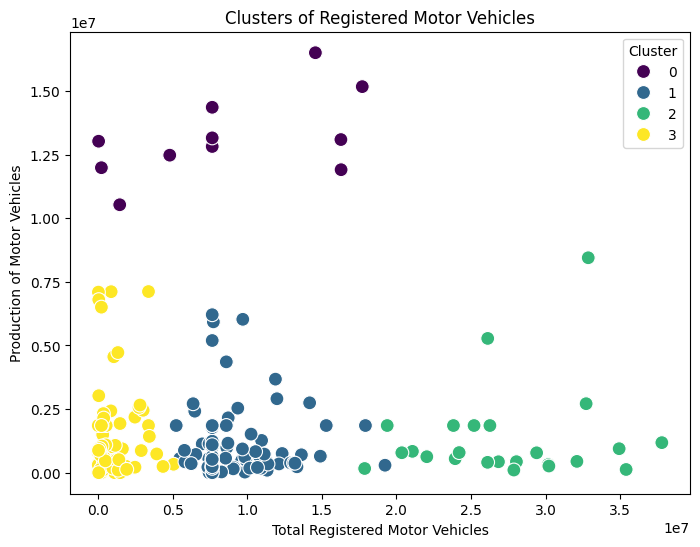

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded['Total Registered Motor Vehicles (UOM:Number)'], 
                y=df_encoded['Production Of Motor Vehicles (UOM:Number)'], 
                hue=df_encoded['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Registered Motor Vehicles')
plt.xlabel('Total Registered Motor Vehicles')
plt.ylabel('Production of Motor Vehicles')
plt.legend(title='Cluster')
plt.show()


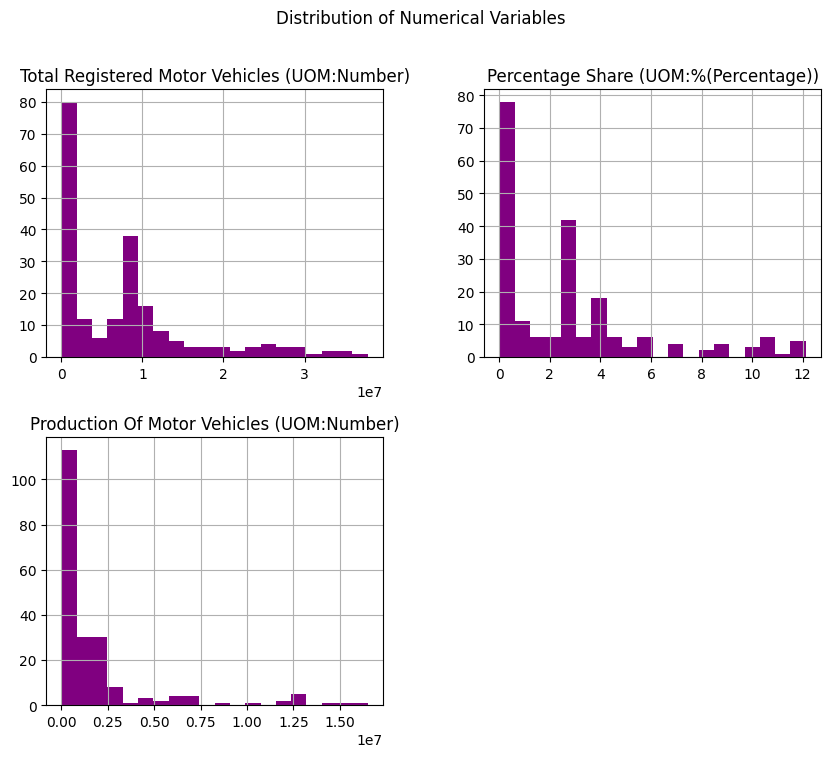

In [14]:
df_encoded[numeric_cols].hist(bins=20, figsize=(10, 8),color='purple')
plt.suptitle('Distribution of Numerical Variables')
plt.show()


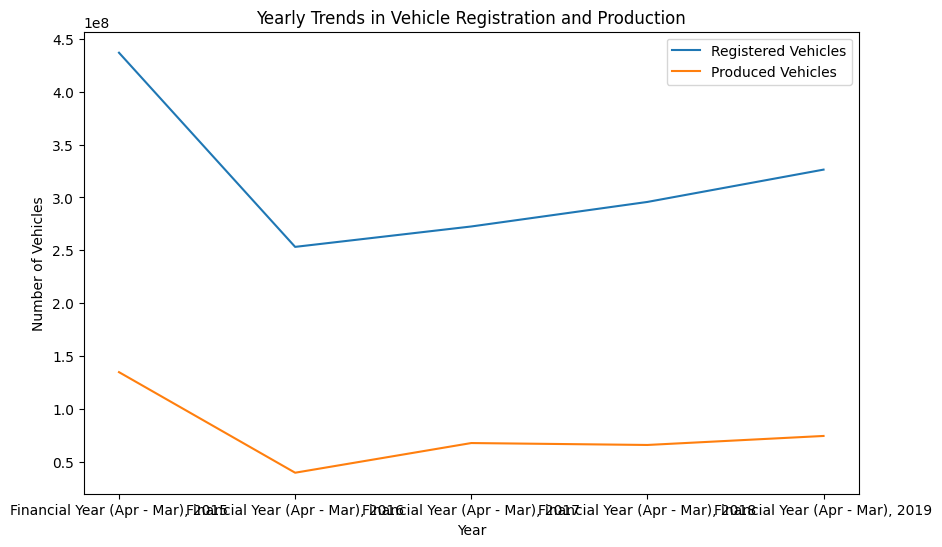

In [15]:
yearly_trends = df.groupby('Year').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Total Registered Motor Vehicles (UOM:Number)'], label='Registered Vehicles')
plt.plot(yearly_trends['Year'], yearly_trends['Production Of Motor Vehicles (UOM:Number)'], label='Produced Vehicles')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Yearly Trends in Vehicle Registration and Production')
plt.legend()
plt.show()


In [16]:
print(df.columns)

Index(['Country', 'State', 'Year',
       'Total Registered Motor Vehicles (UOM:Number)',
       'Percentage Share (UOM:%(Percentage))', 'Vehicle Class',
       'Category Of Vehicle', 'Production Of Motor Vehicles (UOM:Number)',
       'Year.1'],
      dtype='object')


Total Registered Motor Vehicles by State

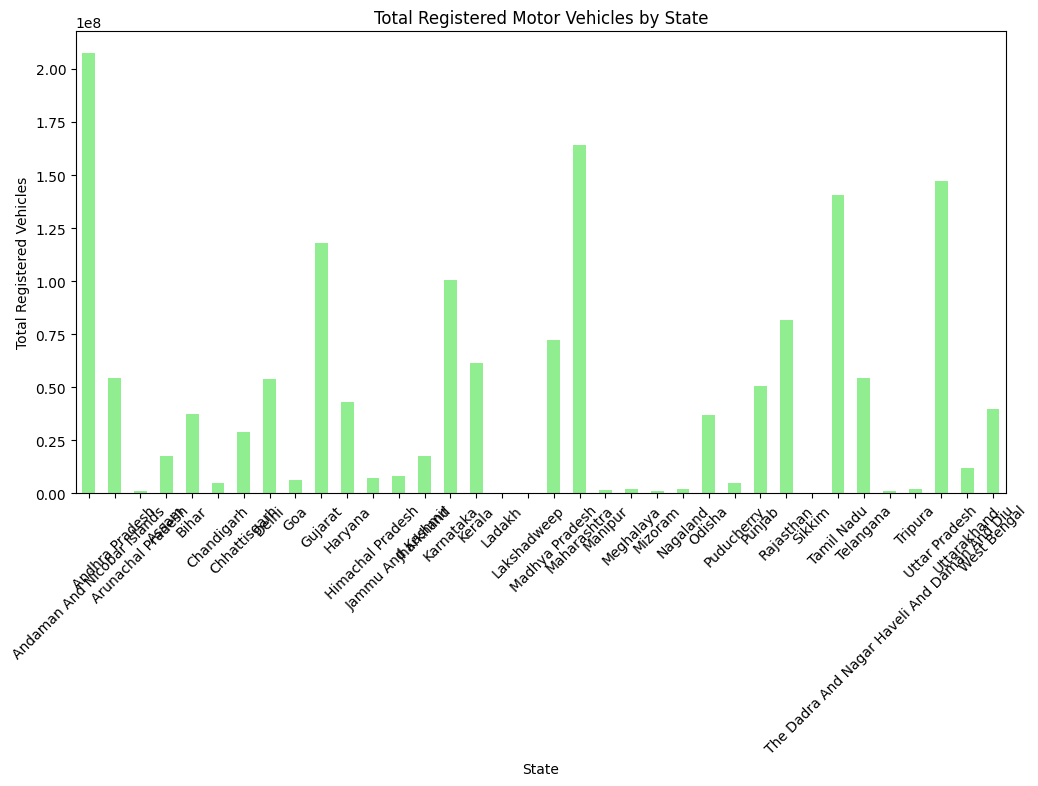

In [17]:
vehicles_by_state = df.groupby('State')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_state.plot(kind='bar', figsize=(12, 6), color="lightgreen", title="Total Registered Motor Vehicles by State")
plt.xlabel("State")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()


Total Registered Motor Vehicles by Vehicle Class

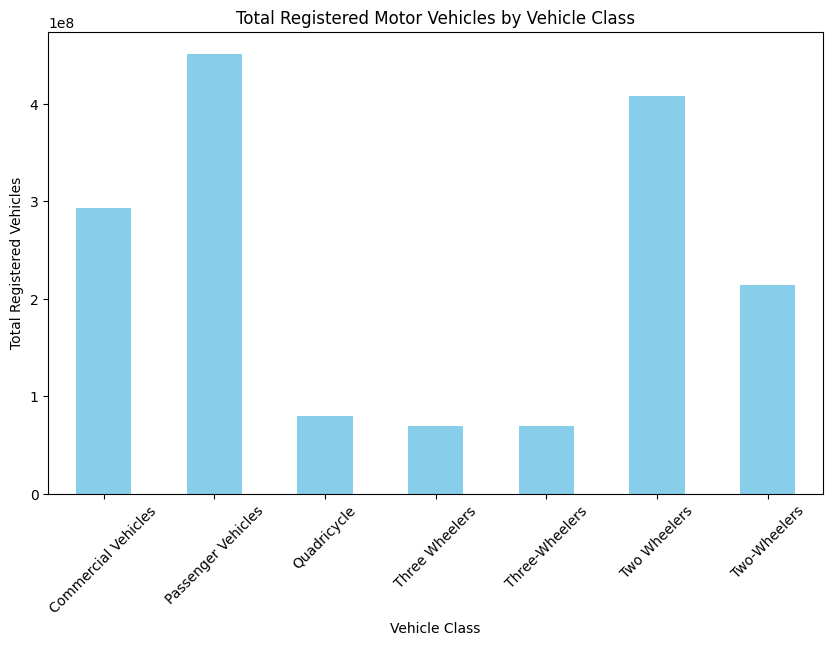

In [18]:
vehicles_by_class = df.groupby('Vehicle Class')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_class.plot(kind='bar', figsize=(10, 6), color="skyblue", title="Total Registered Motor Vehicles by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()


Total Registered Motor Vehicles by Category of Vehicle

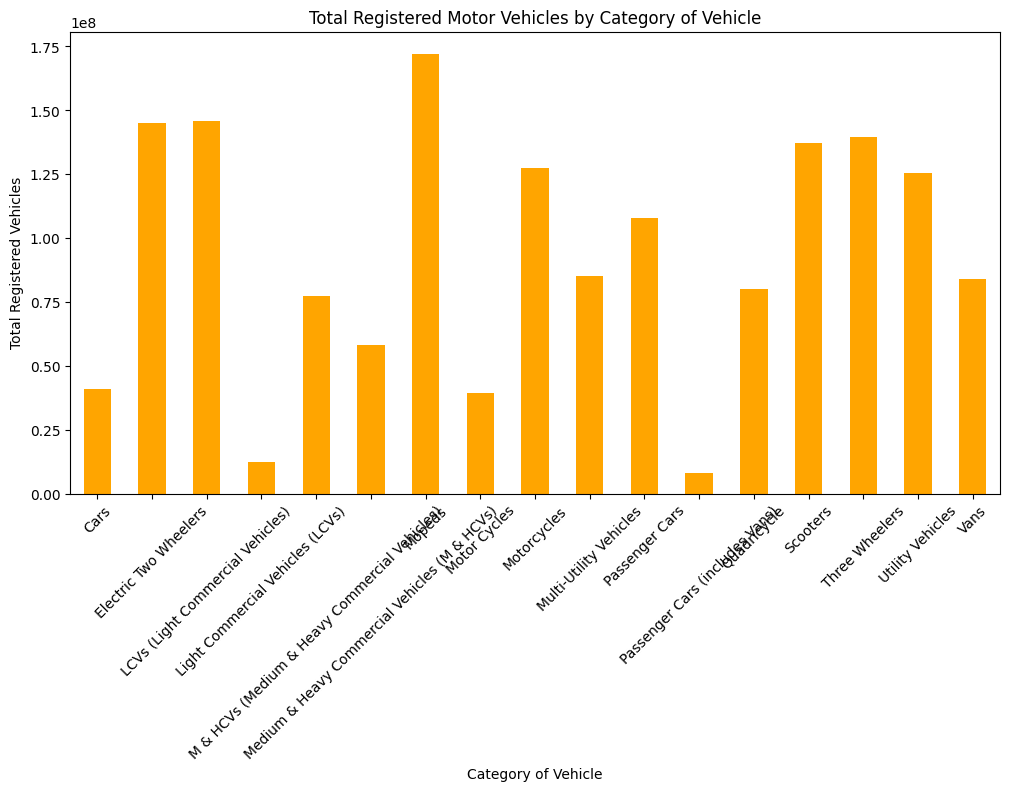

In [19]:
vehicles_by_category = df.groupby('Category Of Vehicle')['Total Registered Motor Vehicles (UOM:Number)'].sum()
vehicles_by_category.plot(kind='bar', figsize=(12, 6), color="orange", title="Total Registered Motor Vehicles by Category of Vehicle")
plt.xlabel("Category of Vehicle")
plt.ylabel("Total Registered Vehicles")
plt.xticks(rotation=45)
plt.show()


Production of Motor Vehicles by State

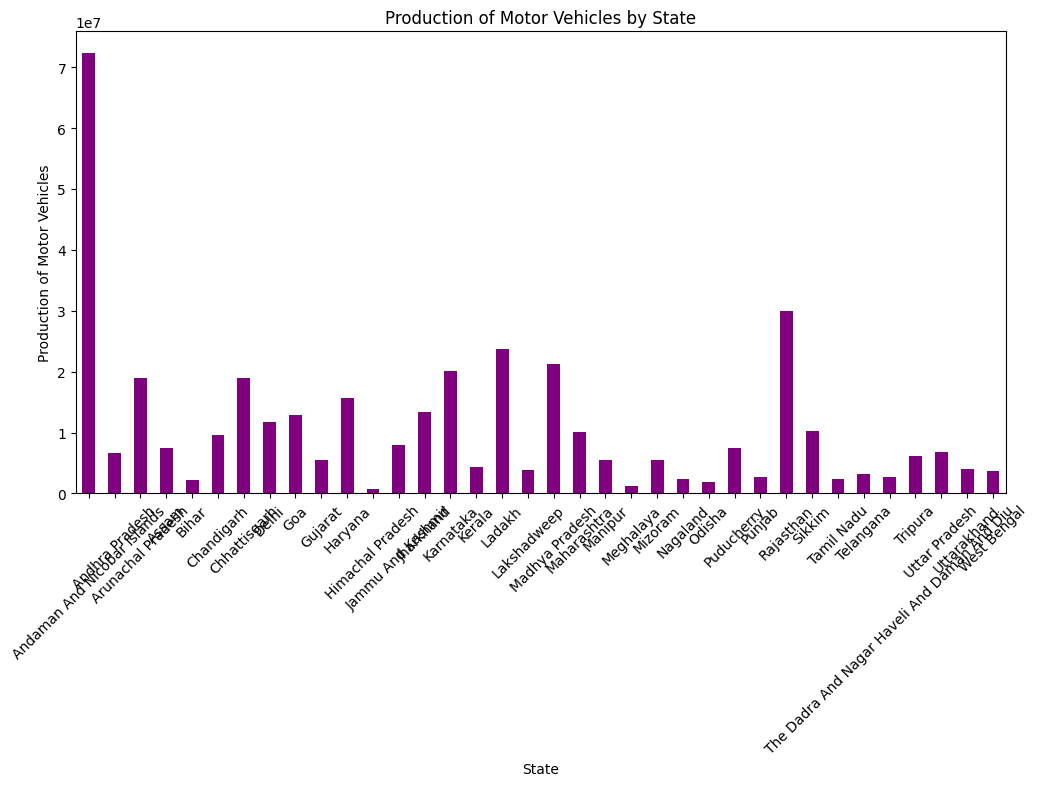

In [20]:
production_by_state = df.groupby('State')['Production Of Motor Vehicles (UOM:Number)'].sum()
production_by_state.plot(kind='bar', figsize=(12, 6), color="purple", title="Production of Motor Vehicles by State")
plt.xlabel("State")
plt.ylabel("Production of Motor Vehicles")
plt.xticks(rotation=45)
plt.show()


Percentage Share of Registered Vehicles by State

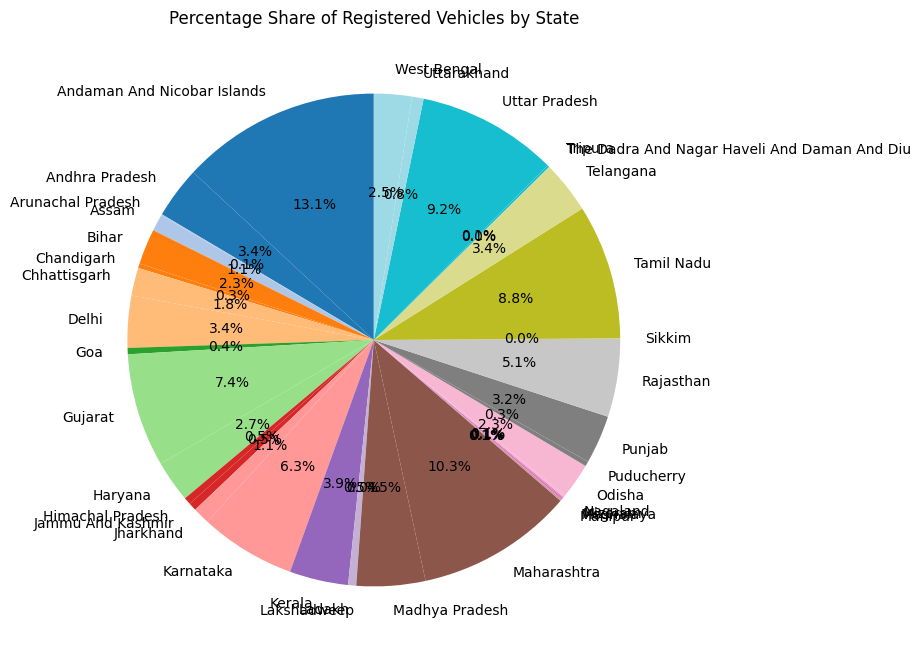

In [21]:
share_by_state = df.groupby('State')['Percentage Share (UOM:%(Percentage))'].sum()
plt.figure(figsize=(10, 8))
share_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Percentage Share of Registered Vehicles by State")
plt.ylabel("") 
plt.show()



 Total Registered Vehicles and Production by Vehicle Class

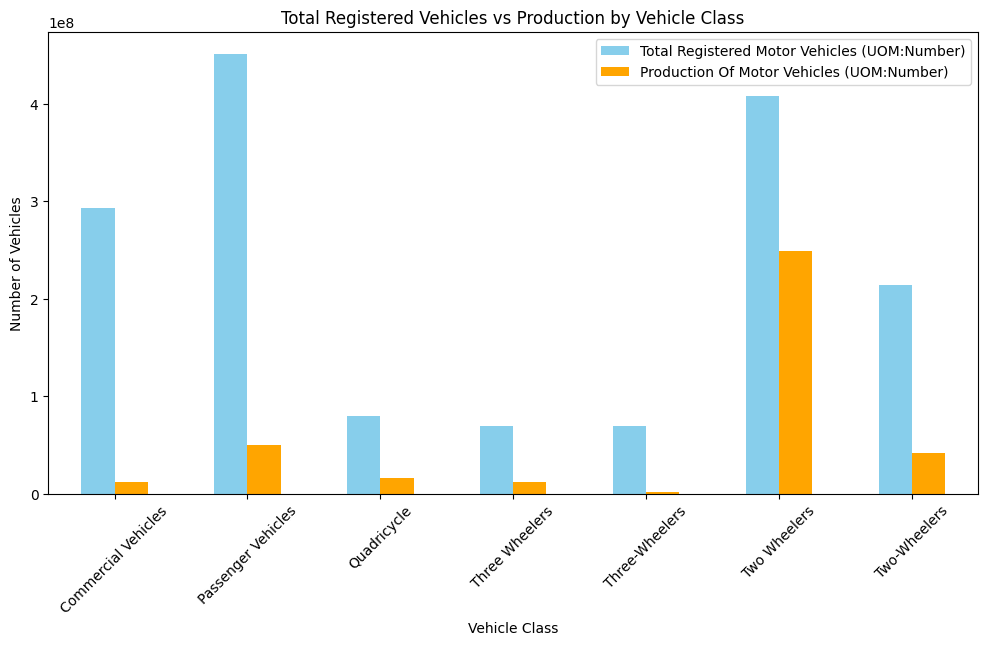

In [22]:

vehicles_class_summary = df.groupby('Vehicle Class').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
vehicles_class_summary.plot(x='Vehicle Class', kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], title="Total Registered Vehicles vs Production by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()


Total Registered Vehicles and Production by Category of Vehicle

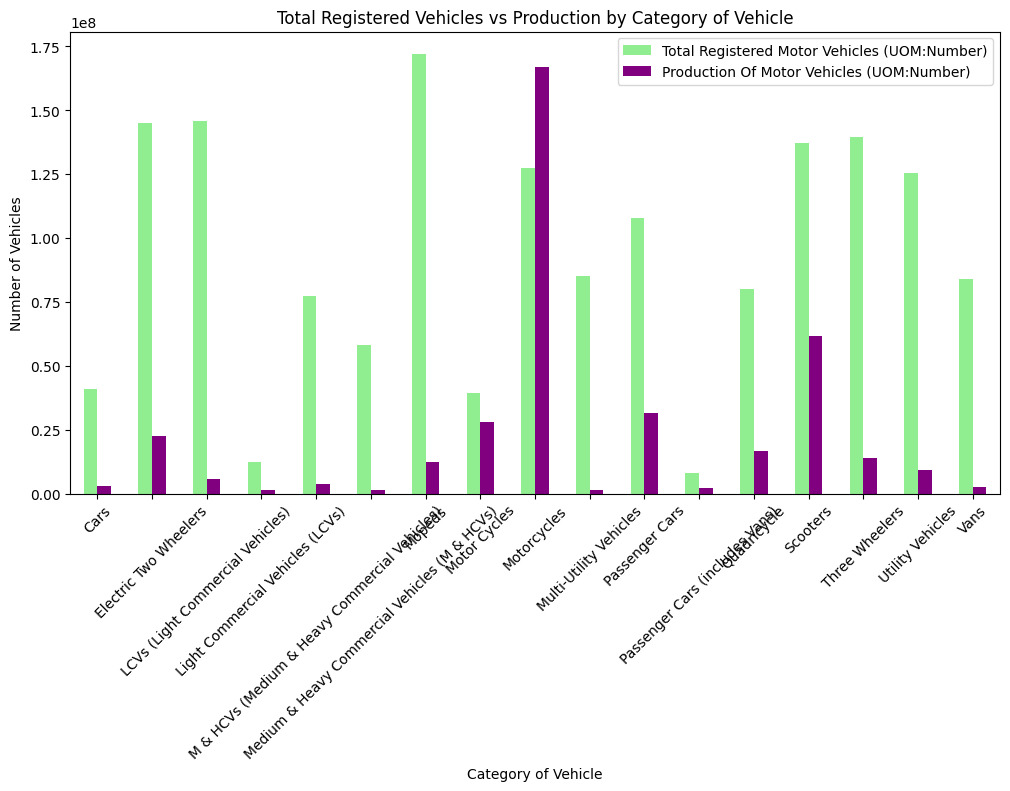

In [23]:
category_summary = df.groupby('Category Of Vehicle').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()

category_summary.plot(x='Category Of Vehicle', kind='bar', figsize=(12, 6), color=['lightgreen', 'purple'], title="Total Registered Vehicles vs Production by Category of Vehicle")
plt.xlabel("Category of Vehicle")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()


Comparing Production and Registration by Vehicle Class

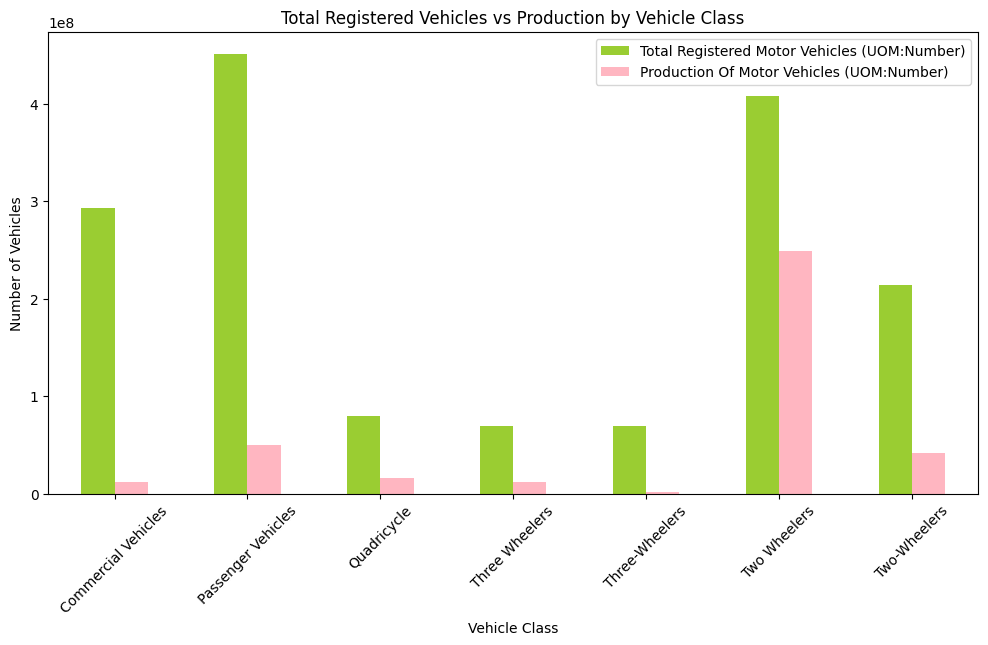

In [24]:
class_summary = df.groupby('Vehicle Class').agg({
    'Total Registered Motor Vehicles (UOM:Number)': 'sum',
    'Production Of Motor Vehicles (UOM:Number)': 'sum'
}).reset_index()
class_summary.plot(x='Vehicle Class', kind='bar', figsize=(12, 6), color=['yellowgreen', 'lightpink'], title="Total Registered Vehicles vs Production by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()
